In [3]:
# load necessary libraries

import warnings
warnings.simplefilter("ignore")

import itertools
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels    
import statsmodels.api as sm
from pandas.tools.plotting import autocorrelation_plot

filename = 'international-airline-passengers.csv'

In [4]:
# ---------------------------------
# set plot attributes
# ---------------------------------
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 10
matplotlib.rcParams['xtick.labelsize'] = 10
matplotlib.rcParams['ytick.labelsize'] = 10
matplotlib.rcParams['text.color'] = 'k'
matplotlib.rcParams['figure.figsize'] = 10, 7

In [5]:
# ---------------------------------
# Load Dataset
# ---------------------------------
dataset = pd.read_csv(filename, 
                      header=0, parse_dates=[0],
                      index_col=0, squeeze=True)
# print dataset
print()
print(dataset.shape)
print(dataset.head(25))


(144,)
Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
1951-01-01    145
Name: Passenger, dtype: int64


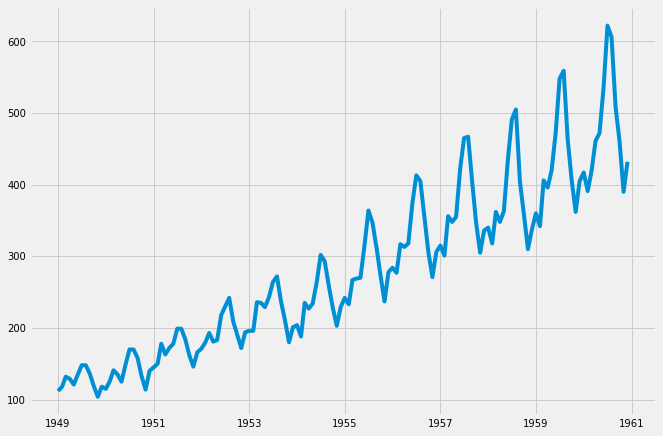

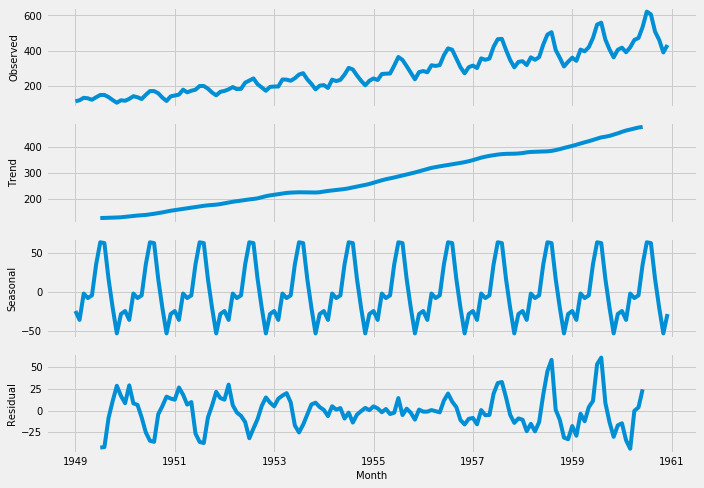

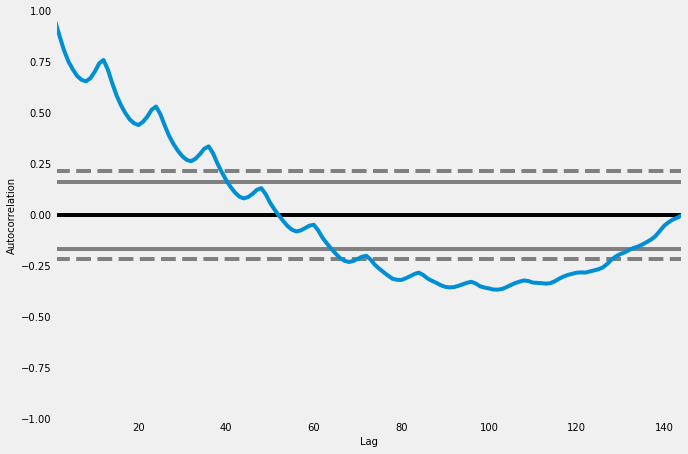

In [6]:
# ---------------------------------
# Visualise Time Series Dataset
# ---------------------------------
# Plot Dataset
plt.plot(dataset)
plt.show()

print('\n\n\n')

# Decompose diffentent Time Series elements e.g. trand, seasonality, Residual ... ...
decomposition = sm.tsa.seasonal_decompose(dataset, model='additive')
decomposition.plot()
plt.show()

print('\n\n\n')

# Auto-correlation plot
autocorrelation_plot(dataset)
plt.show()

In [7]:
# split a multivariate sequence into samples
from numpy import array
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        
        # check if we are beyond the dataset
        if end_ix > len(sequences)-1:
            break
        # gather input and output parts of the pattern
            
        seq_x, seq_y = sequences[i:end_ix], sequences[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# choose a number of time steps
n_steps = 3
    
# convert into input/output
X, y = split_sequences(dataset, n_steps)
    
print(X.shape)
print(y)

(141, 3)
[129 121 135 148 148 136 119 104 118 115 126 141 135 125 149 170 170 158
 133 114 140 145 150 178 163 172 178 199 199 184 162 146 166 171 180 193
 181 183 218 230 242 209 191 172 194 196 196 236 235 229 243 264 272 237
 211 180 201 204 188 235 227 234 264 302 293 259 229 203 229 242 233 267
 269 270 315 364 347 312 274 237 278 284 277 317 313 318 374 413 405 355
 306 271 306 315 301 356 348 355 422 465 467 404 347 305 336 340 318 362
 348 363 435 491 505 404 359 310 337 360 342 406 396 420 472 548 559 463
 407 362 405 417 391 419 461 472 535 622 606 508 461 390 432]


In [8]:
# summarize the data
for i in range(len(X)):
    print(X[i], y[i])

[112 118 132] 129
[118 132 129] 121
[132 129 121] 135
[129 121 135] 148
[121 135 148] 148
[135 148 148] 136
[148 148 136] 119
[148 136 119] 104
[136 119 104] 118
[119 104 118] 115
[104 118 115] 126
[118 115 126] 141
[115 126 141] 135
[126 141 135] 125
[141 135 125] 149
[135 125 149] 170
[125 149 170] 170
[149 170 170] 158
[170 170 158] 133
[170 158 133] 114
[158 133 114] 140
[133 114 140] 145
[114 140 145] 150
[140 145 150] 178
[145 150 178] 163
[150 178 163] 172
[178 163 172] 178
[163 172 178] 199
[172 178 199] 199
[178 199 199] 184
[199 199 184] 162
[199 184 162] 146
[184 162 146] 166
[162 146 166] 171
[146 166 171] 180
[166 171 180] 193
[171 180 193] 181
[180 193 181] 183
[193 181 183] 218
[181 183 218] 230
[183 218 230] 242
[218 230 242] 209
[230 242 209] 191
[242 209 191] 172
[209 191 172] 194
[191 172 194] 196
[172 194 196] 196
[194 196 196] 236
[196 196 236] 235
[196 236 235] 229
[236 235 229] 243
[235 229 243] 264
[229 243 264] 272
[243 264 272] 237
[264 272 237] 211
[272 237 2

In [10]:
# -------------------------
# MLP Model in Keras
# -------------------------
from keras.models import Sequential
from keras.layers import Dense

# define model - using MLP model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=n_steps))
model.add(Dense(80, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
    
model.summary()

# fit model
model.fit(X, y, epochs=10000, verbose=0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               400       
_________________________________________________________________
dense_9 (Dense)              (None, 80)                8080      
_________________________________________________________________
dense_10 (Dense)             (None, 60)                4860      
_________________________________________________________________
dense_11 (Dense)             (None, 40)                2440      
_________________________________________________________________
dense_12 (Dense)             (None, 20)                820       
_________________________________________________________________
dense_13 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total para

In [12]:
# demonstrate prediction
dataset = pd.read_csv("international-airline-passengers.csv")
dataset = dataset['Passenger']
    
# convert into input/output
X, y = split_sequences(dataset, n_steps)    

yhat = model.predict(X, verbose=1)

df_pred = pd.DataFrame.from_records(yhat, columns = ['predicted'])
df_pred = df_pred.reset_index(drop=True)
    
df_actual = dataset[n_steps:len(dataset)]
df_actual = df_actual.reset_index(drop=True)

141/141 [==============================] - 0s 231us/step


In [13]:
# -------------------------------------------------------
# Evaluating the model using different KPIs or metrics
# -------------------------------------------------------

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error

coefficient_of_dermination = r2_score(df_actual, df_pred)
print("R squared: ", coefficient_of_dermination)

mae = mean_absolute_error(df_actual, df_pred)
print('The Mean Absolute Error of our forecasts is {}'.format(round(mae, 2)))

mse = mean_squared_error(df_actual, df_pred)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

msle = mean_squared_log_error(df_actual, df_pred)
print('The Mean Squared Log Error of our forecasts is {}'.format(round(msle, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

R squared:  0.9914960720904563
The Mean Absolute Error of our forecasts is 7.75
The Mean Squared Error of our forecasts is 119.4
The Mean Squared Log Error of our forecasts is 0.0
The Root Mean Squared Error of our forecasts is 10.93


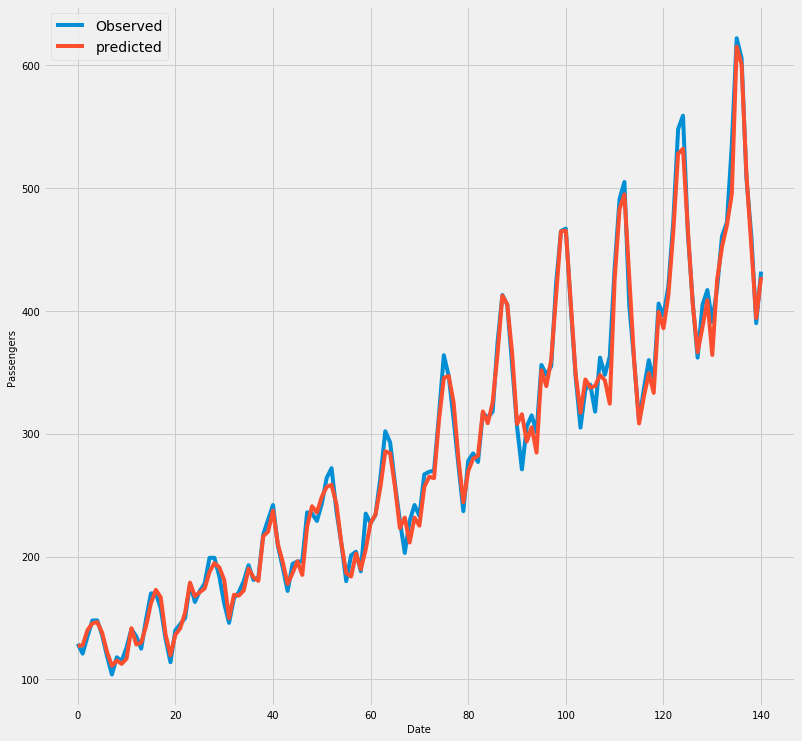

In [14]:
# ---------
# plot
# ---------
ax = df_actual.plot(label='Observed', figsize=(12, 12))
df_pred.plot(ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Passengers')
plt.legend()
plt.show()

1/1 [==============================] - 0s 2ms/step


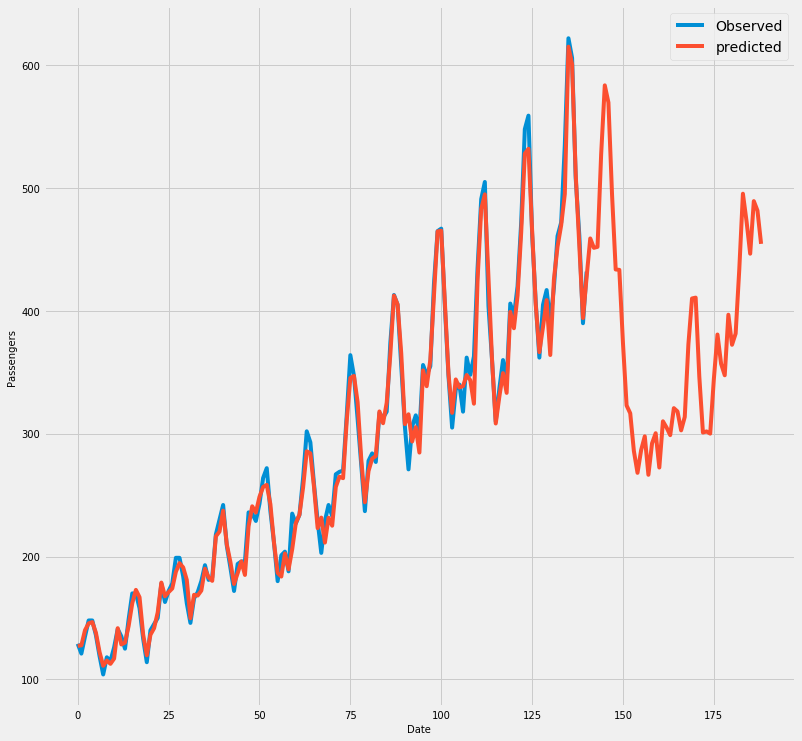

In [19]:
# ---------------------------------------------------------------------------
# Future Predictions
# ---------------------------------------------------------------------------
predictions = model.predict(X, verbose=1)
future_time_steps = 48
x1 = X[-1:]   # take the last input
p1 = predictions[-1:]   # take the last prediction
    
for i in range(future_time_steps):
    x2 = np.array([[x1[0][1], x1[0][2], p1]])
    p2 = model.predict(x2, verbose=1)    
    predictions = np.append(predictions, p2)

    x1 = x2
    p1 = p2

yhat = predictions
yhat = np.reshape(yhat,(-1, 1))

df_pred = pd.DataFrame.from_records(yhat, columns = ['predicted'])
df_pred = df_pred.reset_index(drop=True)
    
df_actual = dataset[n_steps:len(dataset)]
df_actual = df_actual.reset_index(drop=True)    

# plot
ax = df_actual.plot(label='Observed', figsize=(12, 12))
df_pred.plot(ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Passengers')
plt.legend()
plt.show()